In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [4]:
print(train_df.shape)
print(test_df.shape)

(69999, 172)
(30000, 171)


In [5]:
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
obj_cols = train_df.columns[train_df.dtypes == 'object']
obj_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [8]:
train_df[obj_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [9]:
train_df.drop("id", inplace=True, axis=1)
test_df.drop("id", axis=1, inplace=True)

### Lets drop the date columns for now

In [10]:
train_df.drop(obj_cols, axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, circle_id to churn_probability
dtypes: float64(135), int64(27)
memory usage: 86.5 MB


In [11]:
train_df.shape

(69999, 162)

In [12]:
test_df.drop(obj_cols, axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 161 entries, circle_id to jun_vbc_3g
dtypes: float64(135), int64(26)
memory usage: 36.9 MB


In [13]:
test_df.shape

(30000, 161)

#### Drop features with more than 30% missing values

In [14]:
na_features_30 = train_df.columns[train_df.isna().mean() > 0.3]
print(na_features_30.shape)
print(na_features_30)

(27,)
Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [15]:
train_df.drop(na_features_30,axis=1, inplace=True)
test_df.drop(na_features_30,axis=1, inplace=True)

#### Fill remaining na with mean values

In [16]:
mean_values = train_df.mean()

train_df.fillna(mean_values, inplace=True)
test_df.fillna(mean_values, inplace=True)

In [17]:
train_df.columns[train_df.isna().sum() > 0]

Index([], dtype='object')

#### Drop rows with missing values

In [18]:
train_df.dropna(inplace=True)
train_df.shape

(69999, 135)

In [19]:
test_df.dropna(inplace=True)
test_df.shape

(30000, 134)

### Feature Split

In [20]:
y_train = train_df["churn_probability"]
X_train = train_df.copy()
X_train.pop("churn_probability")

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

### Scaling

In [21]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(test_df)

## PCA

In [22]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [23]:
pca.components_

array([[-2.31365075e-19,  1.11022302e-16, -1.11022302e-16, ...,
         4.61153072e-02,  4.64636672e-02,  4.37828669e-02],
       [-9.79390260e-20,  2.77555756e-17,  1.17961196e-16, ...,
         5.33544334e-02,  5.47839632e-02,  5.29310339e-02],
       [-5.61241554e-20, -2.08166817e-17, -8.93382590e-17, ...,
         2.24713525e-01,  2.32474151e-01,  2.21698939e-01],
       ...,
       [-0.00000000e+00, -7.36001411e-02, -1.64698626e-02, ...,
        -1.73472348e-17, -1.73472348e-17,  7.45931095e-17],
       [ 9.99999360e-01, -1.94591686e-04,  9.92813798e-04, ...,
         3.04931861e-19, -2.84603070e-19,  9.82558219e-20],
       [ 0.00000000e+00,  5.81008590e-02, -6.11195775e-02, ...,
        -9.02056208e-17,  1.23165367e-16, -6.59194921e-17]])

In [24]:
pca.explained_variance_

array([1.62295159e+01, 9.50468630e+00, 6.51400084e+00, 5.66755850e+00,
       4.47643414e+00, 4.03483945e+00, 3.55884697e+00, 3.42161254e+00,
       3.06729746e+00, 2.98060622e+00, 2.80928475e+00, 2.78052240e+00,
       2.73399160e+00, 2.64458182e+00, 2.51399475e+00, 2.17776564e+00,
       2.05318592e+00, 1.78131603e+00, 1.75408610e+00, 1.70829044e+00,
       1.68967922e+00, 1.59459818e+00, 1.56944410e+00, 1.44953502e+00,
       1.32161541e+00, 1.24976441e+00, 1.20873362e+00, 1.20415726e+00,
       1.07372611e+00, 1.03242744e+00, 9.89762102e-01, 9.76037121e-01,
       9.48777405e-01, 9.24126313e-01, 8.93213856e-01, 8.77002727e-01,
       8.48294773e-01, 8.33211507e-01, 8.17790270e-01, 7.84917945e-01,
       7.26853113e-01, 7.17886084e-01, 6.81846857e-01, 6.60029552e-01,
       5.91125033e-01, 5.78236238e-01, 5.61181059e-01, 5.41425261e-01,
       5.21336997e-01, 5.12323782e-01, 4.97184514e-01, 4.93136570e-01,
       4.84879255e-01, 4.64265115e-01, 4.46671263e-01, 4.39805329e-01,
      

### 95% of variance are explained by 70 PCA features

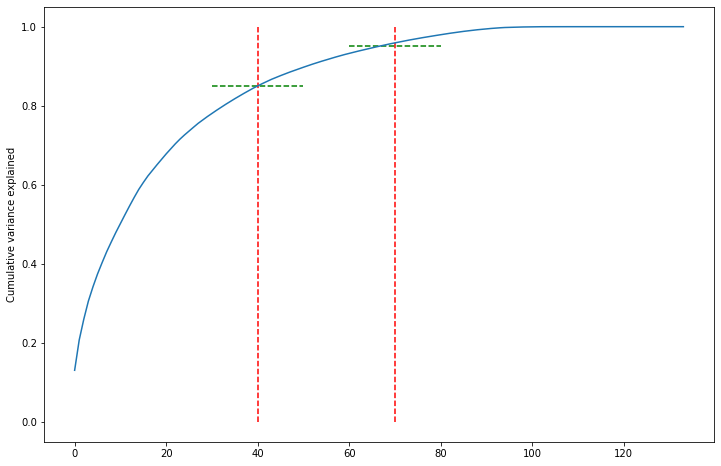

In [25]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=60, colors="g", linestyles="--")
plt.hlines(y=0.85, xmax=50, xmin=30, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Modeling

In [26]:
ipca = IncrementalPCA(n_components=70)
X_train_pca = ipca.fit_transform(X_train)
X_train_pca.shape

(69999, 70)

In [27]:
lr_pca = LogisticRegression(max_iter=200)
model_pca = lr_pca.fit(X_train_pca, y_train)

In [36]:
svc = SVC()
model_svc_pca = svc.fit(X_train_pca,y_train)

#### GridSearchCV

In [28]:
pipeline = Pipeline([
    ('pca',IncrementalPCA()),
    ('clf', None)
])
parameters = [
    {
    'pca__n_components' : (40, 50, 60, 70, 80),
    'clf' : (LogisticRegression(),)
    },
#    {
#    'pca__n_components' : (40, 50, 60, 70, 80),
#    'clf' : (SVC(),)
#    }
]

cv = GridSearchCV(pipeline, parameters,
                        scoring= 'accuracy',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 


cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', IncrementalPCA()),
                                       ('clf', None)]),
             param_grid=[{'clf': (LogisticRegression(),),
                          'pca__n_components': (40, 50, 60, 70, 80)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
cv.best_estimator_

Pipeline(steps=[('pca', IncrementalPCA(n_components=80)),
                ('clf', LogisticRegression())])

In [30]:
cv.best_score_

0.9094415386813344

In [31]:
cv.cv_results_

{'mean_fit_time': array([2.00111361, 1.91065693, 1.92388968, 1.81748323, 1.97981477]),
 'std_fit_time': array([0.1524365 , 0.13465528, 0.08304747, 0.10214462, 0.05392479]),
 'mean_score_time': array([0.00837359, 0.01009507, 0.01519747, 0.0092834 , 0.00938964]),
 'std_score_time': array([0.00271608, 0.00247682, 0.01498656, 0.00093515, 0.00295858]),
 'param_clf': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    LogisticRegression()],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_pca__n_components': masked_array(data=[40, 50, 60, 70, 80],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf': LogisticRegression(), 'pca__n_components': 40},
  {'clf': LogisticRegression(), 'pca__n_components': 50},
  {'clf': LogisticRegression(), 'pca__n_components': 60}

#### Evaluate 

In [32]:
X_test = ipca.transform(test_df.values)
X_test.shape

(30000, 70)

In [33]:
y_pred = model_pca.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
y_pred_df = pd.DataFrame(y_pred, index=np.arange(69999, 99999)).reset_index()
y_pred_df.columns = ["id","churn_probability"]

y_pred_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [35]:
#y_pred_df.to_csv("Krishna_Praveen_Piyush.csv", index=False)

#### to-do
- train-test split on train.csv